# Custom Transformer

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import set_config; set_config(display='diagram')

👇 Consider the following dataset

In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,days_until_delivery
0,RJ,SP,1825,53,10,40,9
1,RJ,SP,700,65,18,28,9
2,RJ,SP,1825,53,10,40,11
3,RJ,SP,1825,53,10,40,12
4,RJ,SP,1825,53,10,40,14


- Each observation of the dataset represents an item being delivered from a  `seller_state` to a `customer_state`. 
- Other columns describe the packaging properties of each item.

🎯 The target is the number of days between the order and the delivery.

<AxesSubplot:xlabel='days_until_delivery', ylabel='Count'>

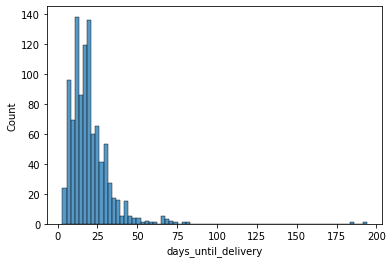

In [ ]:
# Check target
sns.histplot(data.days_until_delivery)

## 1. Pipeline

👇 Create a scikit-learn pipeline named `pipe`:

- Engineer a `volume` feature from the dimensions features
- Preserve the original product dimensions features for training
- Scale all numerical features
- Encode the categorical features
- Add a default `Ridge` regression estimator

<details><summary>Hints</summary>

- There are many ways to create your preprocessed matrix (using `ColumnTransformer` and/or `FeatureUnion`). 
    
- If your transformed feature matrix look wierd, it may be stored as "sparse" by the default behavior of `OneHotEncoder(sparse=True)`. Use `.todense()` to turn it back to a dense matrix

</details>

In [ ]:
# YOUR CODE HERE

### solution

#### Preprocessing Solution 1: Function Transformer

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator

from sklearn.pipeline import FeatureUnion

In [ ]:
X = data.drop(columns=['days_until_delivery'])
y = data['days_until_delivery']
X.head()

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,RJ,SP,1825,53,10,40
1,RJ,SP,700,65,18,28
2,RJ,SP,1825,53,10,40
3,RJ,SP,1825,53,10,40
4,RJ,SP,1825,53,10,40


In [ ]:
def multiply(df):
    return pd.DataFrame(
        df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm'])
    
volume_computer = Pipeline([
    ('compute_volume', FunctionTransformer(multiply)),
    ('scale_volume', MinMaxScaler())
])

final_preprocessor = ColumnTransformer([
    ('num_encoder', MinMaxScaler(), make_column_selector(dtype_include="int64")),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False), make_column_selector(dtype_include="object")),
    ('volume_computer', volume_computer, ['product_length_cm','product_height_cm','product_width_cm'])
])
final_preprocessor

ColumnTransformer(transformers=[('num_encoder', MinMaxScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13f30fa00>),
                                ('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13f30fc70>),
                                ('volume_computer',
                                 Pipeline(steps=[('compute_volume',
                                                  FunctionTransformer(func=<function multiply at 0x13f30a160>)),
                                                 ('scale_volume',
                                                  MinMaxScaler())]),
                                 ['product_length_cm', 'product_height_cm',
                                  'product_width_cm'])])

In [ ]:
pd.DataFrame(final_preprocessor.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177
1,0.020067,0.548780,0.147727,0.158879,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125218
2,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177
3,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177
4,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177


In [ ]:
preprocessor = ColumnTransformer([
    ('num_encoder', MinMaxScaler(), make_column_selector(dtype_include="int64")),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse=False), make_column_selector(dtype_include="object"))
])

def multiply(df):
    return pd.DataFrame(df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm'])
    
volume_computer = Pipeline([
    ('compute_volume', FunctionTransformer(multiply)),
    ('scale_volume', MinMaxScaler())
])

final_preprocessor2 = FeatureUnion([
    ('preprocessess', preprocessor),
    ('compute_volume', volume_computer)
])
final_preprocessor2

FeatureUnion(transformer_list=[('preprocessess',
                                ColumnTransformer(transformers=[('num_encoder',
                                                                 MinMaxScaler(),
                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13f38f520>),
                                                                ('cat_encoder',
                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                               sparse=False),
                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13f38f5e0>)])),
                               ('compute_volume',
                                Pipeline(steps=[('compute_volume',
                                                 FunctionTransformer(func=<function multiply at 0x13f31e940>)),
                                                ('scale_volume',
                                                 MinMaxScaler())]))])

In [ ]:
pd.DataFrame(final_preprocessor2.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177
1,0.020067,0.548780,0.147727,0.158879,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125218
2,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177
3,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177
4,0.057692,0.402439,0.056818,0.271028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.079177


#### Preprocessing Solution 2: Custom transformer class (overkill)

In [ ]:
# Create a class
class ColumnMultiplier(TransformerMixin, BaseEstimator): 
# TransformerMixin generates a fit_transform method from fit and transform
# BaseEstimator generates get_params and set_params methods
    
    # Create parameters "column_1", "column_2", "column_3" to choose which columns of dataframe to multiply
    def __init__(self, column_1, column_2, column_3):
        self.column_1 = column_1
        self.column_2 = column_2
        self.column_3 = column_3
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # Multiplication
        multiplied_features =X[self.column_1]*X[self.column_2]*X[self.column_3]
        
        # Return result as dataframe (for integration into ColumnTransformer)
        return pd.DataFrame(multiplied_features, columns=['volume'])

In [ ]:
# Plug custom transformer into a feature engineering ColumnTransformer
# Select and preserve the original features
feature_engineering = ColumnTransformer([
    ('column_multiplier', ColumnMultiplier(column_1="product_length_cm",
                                           column_2="product_height_cm",
                                           column_3="product_width_cm"),
     ['product_length_cm', 'product_height_cm', "product_width_cm"]),

    ('select_original_features', FunctionTransformer(lambda x: x), ['product_length_cm',
                                                                    'product_height_cm',
                                                                    'product_width_cm',
                                                                    'product_weight_g'])])

# Chain the feature engineering transformer with a scaler
numerical_pipe = Pipeline([
    ('engineering', feature_engineering),
    ('scaling', MinMaxScaler())])

# Create a final preprocessing pipeline that combines the above pipeline with a One hot encoder for categorical features
final_preprocessor3 = ColumnTransformer([
    ('categorical_preprocessing', OneHotEncoder(sparse=False,
                                                handle_unknown='ignore'), make_column_selector(dtype_include="object")),
    ('numerical_preprocessing', numerical_pipe, make_column_selector(dtype_include="int64"))])

In [ ]:
final_preprocessor3

ColumnTransformer(transformers=[('categorical_preprocessing',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13f30f910>),
                                ('numerical_preprocessing',
                                 Pipeline(steps=[('engineering',
                                                  ColumnTransformer(transformers=[('column_multiplier',
                                                                                   ColumnMultiplier(column_1='product_length_cm',
                                                                                                    c...
                                                                                                    column_3='product_width_cm'),
                                                                                   ['product_length_cm',
                                                                                    'product_height_cm',
                                                                                    'product_width_cm']),
                                                                                  ('select_original_features',
                                                                                   FunctionTransformer(func=<function <lambda> at 0x13f31e4c0>),
                                                                                   ['product_length_cm',
                                                                                    'product_height_cm',
                                                                                    'product_width_cm',
                                                                                    'product_weight_g'])])),
                                                 ('scaling', MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13f393100>)])

In [ ]:
pd.DataFrame(final_preprocessor3.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.079177,0.402439,0.056818,0.271028,0.057692
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.125218,0.548780,0.147727,0.158879,0.020067
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.079177,0.402439,0.056818,0.271028,0.057692
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.079177,0.402439,0.056818,0.271028,0.057692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.079177,0.402439,0.056818,0.271028,0.057692


In [ ]:
final_preprocessor3.fit_transform(X).shape

(1000, 32)

#### Full Pipe solution

In [ ]:
from sklearn.linear_model import Ridge

# Chain the final_preprocessor pipeline with a linear regression model
pipe = Pipeline([
    ('preprocessing', final_preprocessor),
    ('linear_regression', Ridge())])
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_encoder', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13f30fa00>),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13f30fc70>),
                                                 ('volume_computer',
                                                  Pipeline(steps=[('compute_volume',
                                                                   FunctionTransformer(func=<function multiply at 0x13f30a160>)),
                                                                  ('scale_volume',
                                                                   MinMaxScaler())]),
                                                  ['product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm'])])),
                ('linear_regression', Ridge())])

#### 🧪 Test your pipe

In [ ]:
from nbresult import ChallengeResult

pipe_test = pipe

# Check that it doesn't crash
assert pipe_test.fit(X,y)

result = ChallengeResult('pipe', 
                         shape = pipe_test[:-1].fit_transform(X).shape
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/brunolajoie/.pyenv/versions/lewagon3812/bin/python3
cachedir: .pytest_cache
rootdir: /Users/brunolajoie/code/lewagon/data-solutions/05-ML/08-Workflow/02-Custom-Transformer
plugins: anyio-3.3.0, dash-2.0.0
collecting ... collected 1 item

tests/test_pipe.py::TestPipe::test_pipe_not_crashing PASSED              [100%]

============================== 1 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/pipe.pickle

git commit -m 'Completed pipe step'

git push origin master


## 2. Train and Predict

👇 Let's imagine `data` is your entire training set.

- `cross_validate` your pipeline on this dataset (❗️low r2 score are expected)
- Now, imagine you just received an new order `new_data`: predict it's duration of delivery in a variable `prediction`

In [ ]:
new_data = pd.read_csv("data_new.csv")
new_data

,customer_state,seller_state,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,RJ,SP,1825,53,10,40


In [ ]:
# YOUR CODE HERE

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validate the final_pipe
cross_val_score(pipe, X, y, cv=10, scoring='r2').mean()

0.15824755009515182

In [ ]:
# Fit the final pipe to the data
pipe.fit(X, y)

In [ ]:
# Use final pipe for prediction
prediction = pipe.predict(new_data)
prediction

array([20.67221182])

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
    prediction = prediction
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/brunolajoie/.pyenv/versions/lewagon3812/bin/python3
cachedir: .pytest_cache
rootdir: /Users/brunolajoie/code/lewagon/data-solutions/05-ML/08-Workflow/02-Custom-Transformer
plugins: anyio-3.3.0, dash-2.0.0
collecting ... collected 1 item

tests/test_prediction.py::TestPrediction::test_prediction PASSED         [100%]

============================== 1 passed in 0.59s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master


#### Solution Bonus: get feature names

In [ ]:
set_config(display='diagram')
final_pipe

In [ ]:
pd.DataFrame(data=final_pipe['preprocessing'].fit_transform(X)).head()

In [ ]:
from sklearn import set_config; set_config(display='text')

In [ ]:
final_pipe['preprocessing'].transformers_

In [ ]:
col_num = final_pipe['preprocessing'].transformers_[0][2]
col_num

In [ ]:
final_pipe['preprocessing'].transformers_[1][1].get_feature_names_out()

In [ ]:
col_cat = list(final_pipe['preprocessing'].transformers_[1][1].get_feature_names_out())

In [ ]:
final_pipe['preprocessing'].transformers_[2]
col_volume = ['volume']

In [ ]:
import itertools
col_prepross = list(itertools.chain(col_num, col_cat, col_volume))

In [ ]:
len(col_prepross)

In [ ]:
pd.DataFrame(data=final_pipe['preprocessing'].fit_transform(X), columns=col_prepross).head()

🏁 Congratulation. Don't forget to add, commit and push your notebook.